<a href="https://colab.research.google.com/github/Cavidan-oss/Javidan_Karimli_IDS_706_Cloud_Based_Notebook/blob/main/Javidan_Karimli_IDS_706_CloudHostedDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# NBVAL_IGNORE_OUTPUT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import squarify

In [5]:
# NBVAL_IGNORE_OUTPUT

warnings.filterwarnings('ignore')

# Cleaning

In [6]:
# NBVAL_IGNORE_OUTPUT

data = pd.read_csv('https://raw.githubusercontent.com/Cavidan-oss/Javidan_Karimli_IDS_706_Cloud_Based_Notebook/refs/heads/main/data/olympics.csv')
data.columns = data.iloc[0]
data.drop(0,axis = 0, inplace = True)

In [7]:
{
  "tags": ["test-me"]
}

expected_columns = list(data.columns)
actual_columns = ['Total', '№ Summer', '№ Games', 'Combined total']

assert len(data) > 0
assert data.shape[1] == 16
assert data.shape[0] == 147
assert not data.head(5).isnull().values.any(), "Missing values found in the first 5 rows."
assert set(expected_columns).issuperset(set(actual_columns)), "Columns were not renamed correctly."


In [8]:
# NBVAL_IGNORE_OUTPUT

list(data.columns)

[nan,
 '№ Summer',
 '01 !',
 '02 !',
 '03 !',
 'Total',
 '№ Winter',
 '01 !',
 '02 !',
 '03 !',
 'Total',
 '№ Games',
 '01 !',
 '02 !',
 '03 !',
 'Combined total']

In [9]:
# NBVAL_IGNORE_OUTPUT

data.shape

(147, 16)

In [10]:
# NBVAL_IGNORE_OUTPUT

data.sort_values('Combined total', ascending = False)

,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
12,Belarus (BLR),5,12,24,39,75,6,6,4,5,15,11,18,28,44,90
99,Philippines (PHI),20,0,2,7,9,4,0,0,0,0,24,0,2,7,9
112,Serbia and Montenegro (SCG) [SCG],3,2,4,3,9,3,0,0,0,0,6,2,4,3,9
76,Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9
132,Turkey (TUR),21,39,25,24,88,16,0,0,0,0,37,39,25,24,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Montenegro (MNE),2,0,1,0,1,2,0,0,0,0,4,0,1,0,1
38,Eritrea (ERI),4,0,0,1,1,0,0,0,0,0,4,0,0,1,1
43,Gabon (GAB),9,0,1,0,1,0,0,0,0,0,9,0,1,0,1
53,Guatemala (GUA),13,0,1,0,1,1,0,0,0,0,14,0,1,0,1


In [11]:
# NBVAL_IGNORE_OUTPUT

names ={'01 !' : 'Gold', '02 !': 'Silver', '03 !': 'Bronze'}

In [12]:
# NBVAL_IGNORE_OUTPUT

data.columns = list(map(lambda x: names[x] if x in names.keys() else x, data.columns))

In [13]:
# NBVAL_IGNORE_OUTPUT

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 1 to 147
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nan             147 non-null    object
 1   № Summer        147 non-null    object
 2   Gold            147 non-null    object
 3   Silver          147 non-null    object
 4   Bronze          147 non-null    object
 5   Total           147 non-null    object
 6   № Winter        147 non-null    object
 7   Gold            147 non-null    object
 8   Silver          147 non-null    object
 9   Bronze          147 non-null    object
 10  Total           147 non-null    object
 11  № Games         147 non-null    object
 12  Gold            147 non-null    object
 13  Silver          147 non-null    object
 14  Bronze          147 non-null    object
 15  Combined total  147 non-null    object
dtypes: object(16)
memory usage: 18.5+ KB


In [14]:
# NBVAL_IGNORE_OUTPUT

data.rename(columns = {np.nan : 'Country'}, inplace = True)

In [15]:
# NBVAL_IGNORE_OUTPUT

total_medals = data[data['Country'] == 'Totals']

In [16]:
# NBVAL_IGNORE_OUTPUT

data.drop(index = (147), axis = 1,inplace = True)

In [17]:
# NBVAL_IGNORE_OUTPUT

data['Combined total'].astype('int32')

1       2
2      15
3      70
4      12
5      12
       ..
142    87
143     3
144     2
145     8
146    17
Name: Combined total, Length: 146, dtype: int32

In [18]:
# NBVAL_IGNORE_OUTPUT
data[data['№ Summer'] == '1']

,Country,№ Summer,Gold,Silver,Bronze,Total,№ Winter,Gold,Silver,Bronze,Total,№ Games,Gold,Silver,Bronze,Combined total
18,British West Indies (BWI) [BWI],1,0,0,2,2,0,0,0,0,0,1,0,0,2,2
108,Unified Team (EUN) [EUN],1,45,38,29,112,1,9,6,8,23,2,54,44,37,135
143,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3


In [19]:
# NBVAL_IGNORE_OUTPUT
data.columns

Index(['Country', '№ Summer', 'Gold', 'Silver', 'Bronze', 'Total', '№ Winter',
       'Gold', 'Silver', 'Bronze', 'Total', '№ Games', 'Gold', 'Silver',
       'Bronze', 'Combined total'],
      dtype='object')

In [20]:
# NBVAL_IGNORE_OUTPUT
columns_to_integer = ['№ Summer', 'Gold', 'Silver', 'Bronze', 'Total', '№ Winter',
       'Gold', 'Silver', 'Bronze', 'Total', '№ Games', 'Gold', 'Silver',
       'Bronze', 'Combined total']

In [21]:
# NBVAL_IGNORE_OUTPUT
for column in columns_to_integer:
    data[column] = data[column].astype('int32')

In [22]:
# NBVAL_IGNORE_OUTPUT
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 1 to 146
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         146 non-null    object
 1   № Summer        146 non-null    int32 
 2   Gold            146 non-null    int32 
 3   Silver          146 non-null    int32 
 4   Bronze          146 non-null    int32 
 5   Total           146 non-null    int32 
 6   № Winter        146 non-null    int32 
 7   Gold            146 non-null    int32 
 8   Silver          146 non-null    int32 
 9   Bronze          146 non-null    int32 
 10  Total           146 non-null    int32 
 11  № Games         146 non-null    int32 
 12  Gold            146 non-null    int32 
 13  Silver          146 non-null    int32 
 14  Bronze          146 non-null    int32 
 15  Combined total  146 non-null    int32 
dtypes: int32(15), object(1)
memory usage: 9.8+ KB


In [23]:
# NBVAL_IGNORE_OUTPUT
def correct_country_names(row):
    stop_index = row.index(')')

    return row[:stop_index +1 ]

In [24]:
# NBVAL_IGNORE_OUTPUT
data.head()

,Country,№ Summer,Gold,Silver,Bronze,Total,№ Winter,Gold,Silver,Bronze,Total,№ Games,Gold,Silver,Bronze,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [25]:
# NBVAL_IGNORE_OUTPUT
data['Country']= data['Country'].map(lambda x: correct_country_names(x))


In [26]:
# NBVAL_IGNORE_OUTPUT
df= pd.melt(data.drop(columns = ['Combined total']), id_vars = ('Country'), value_vars = ( 'Gold', 'Silver', 'Bronze', 'Total'),
           var_name='Type', value_name='Count')

In [27]:
# NBVAL_IGNORE_OUTPUT
data['Country_code'] = data['Country'].map(lambda x: x[-5:].strip('()'))

In [28]:
# NBVAL_IGNORE_OUTPUT
data.columns = ['Country','№ Summer', 'S_Gold', 'S_Silver', 'S_Bronze', 'S_Total', '№ Winter',
       'W_Gold', 'W_Silver', 'W_Bronze', 'W_Total', '№ Games', 'T_Gold', 'T_Silver',
       'T_Bronze', 'Combined total','Country_code']

In [29]:
# NBVAL_IGNORE_OUTPUT
data['Country'] = data['Country'].map(lambda x: x[:-5])

In [30]:
# NBVAL_IGNORE_OUTPUT
winter_data = data[['Country', "№ Winter", 'W_Gold', 'W_Silver', 'W_Bronze', 'W_Total']]
winter_data['tournament']= ['Winter']* len(winter_data)
winter_data.columns = ['Country', 'Attended', 'Gold', 'Silver', 'Bronze', 'Total', 'Tournament']
winter_data

,Country,Attended,Gold,Silver,Bronze,Total,Tournament
1,Afghanistan,0,0,0,0,0,Winter
2,Algeria,3,0,0,0,0,Winter
3,Argentina,18,0,0,0,0,Winter
4,Armenia,6,0,0,0,0,Winter
5,Australasia,0,0,0,0,0,Winter
...,...,...,...,...,...,...,...
142,Yugoslavia,14,0,3,1,4,Winter
143,Independent Olympic Participants,0,0,0,0,0,Winter
144,Zambia,0,0,0,0,0,Winter
145,Zimbabwe,1,0,0,0,0,Winter


In [31]:
# NBVAL_IGNORE_OUTPUT
summer_data = data[['Country', "№ Summer", 'S_Gold', 'S_Silver', 'S_Bronze', 'S_Total']]
summer_data['tournament']= ['Summer']* len(summer_data)
summer_data.columns = ['Country', 'Attended', 'Gold', 'Silver', 'Bronze', 'Total', 'Tournament']
summer_data

,Country,Attended,Gold,Silver,Bronze,Total,Tournament
1,Afghanistan,13,0,0,2,2,Summer
2,Algeria,12,5,2,8,15,Summer
3,Argentina,23,18,24,28,70,Summer
4,Armenia,5,1,2,9,12,Summer
5,Australasia,2,3,4,5,12,Summer
...,...,...,...,...,...,...,...
142,Yugoslavia,16,26,29,28,83,Summer
143,Independent Olympic Participants,1,0,1,2,3,Summer
144,Zambia,12,0,1,1,2,Summer
145,Zimbabwe,12,3,4,1,8,Summer


In [32]:
# NBVAL_IGNORE_OUTPUT
data.head()

,Country,№ Summer,S_Gold,S_Silver,S_Bronze,S_Total,№ Winter,W_Gold,W_Silver,W_Bronze,W_Total,№ Games,T_Gold,T_Silver,T_Bronze,Combined total,Country_code
1,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
2,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
3,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
4,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
5,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


# Visualizing

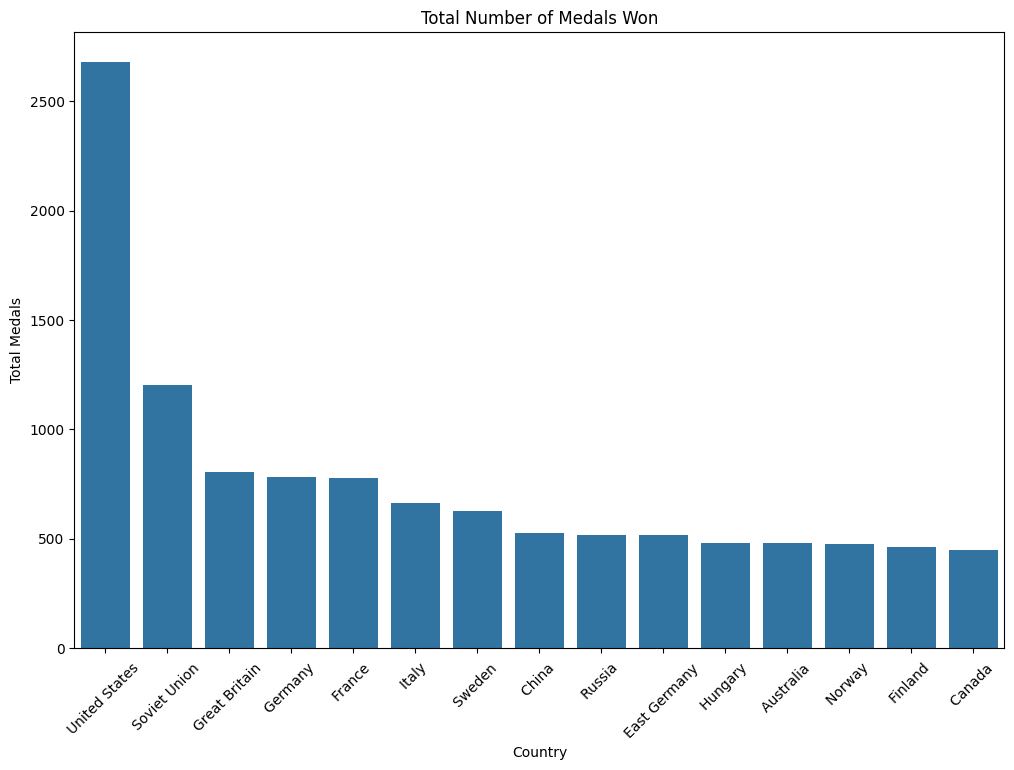

In [33]:
# NBVAL_IGNORE_OUTPUT
top_winners_totals = data.sort_values('Combined total', ascending = False).head(15)


plt.figure(figsize = (12,8))

sns.barplot(data = top_winners_totals, x = 'Country', y = 'Combined total')
plt.xticks(rotation = 45)
plt.ylabel('Total Medals')
plt.title("Total Number of Medals Won")
plt.show()

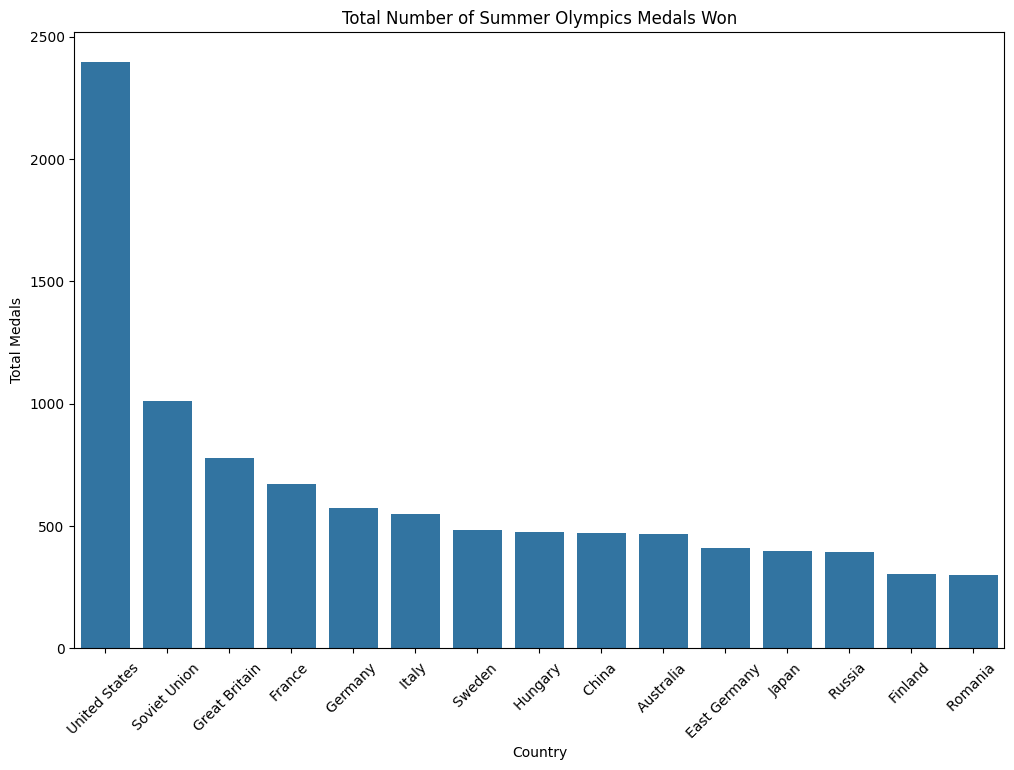

In [34]:
# NBVAL_IGNORE_OUTPUT
top_winners_summer = data.sort_values('S_Total', ascending = False).head(15)


plt.figure(figsize = (12,8))

sns.barplot(data = top_winners_summer, x = 'Country', y = 'S_Total')
plt.xticks(rotation = 45)
plt.ylabel('Total Medals')
plt.title("Total Number of Summer Olympics Medals Won")
plt.show()

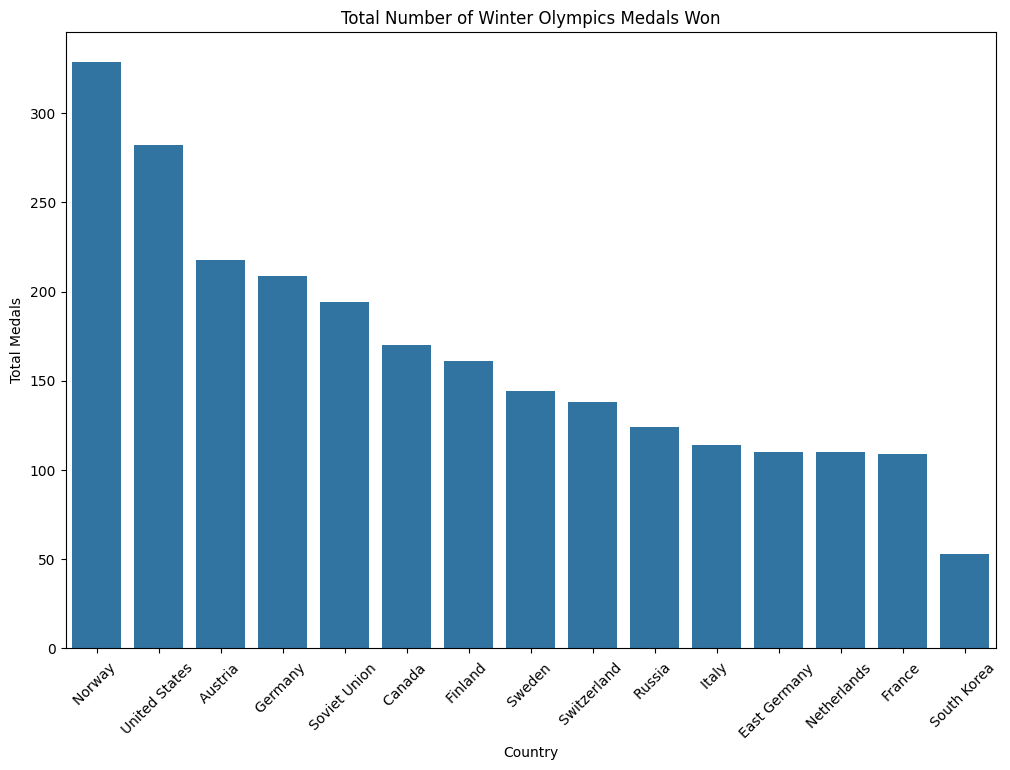

In [35]:
# NBVAL_IGNORE_OUTPUT
top_winners_winter = data.sort_values('W_Total', ascending = False).head(15)


plt.figure(figsize = (12,8))

sns.barplot(data = top_winners_winter, x = 'Country', y = 'W_Total')
plt.xticks(rotation = 45)
plt.ylabel('Total Medals')
plt.title("Total Number of Winter Olympics Medals Won")
plt.show()

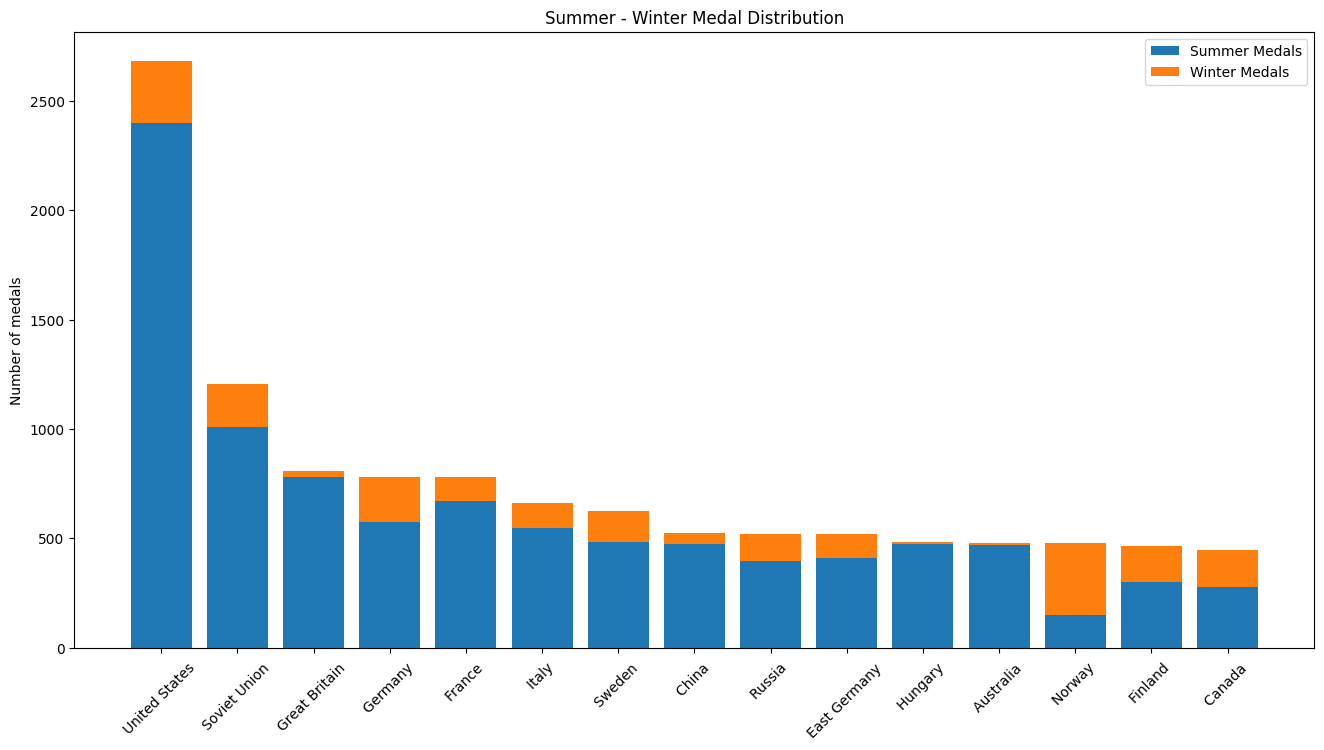

In [36]:
# NBVAL_IGNORE_OUTPUT

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(top_winners_totals['Country'], top_winners_totals['S_Total'], label = 'Summer Medals')
ax.bar(top_winners_totals['Country'], top_winners_totals["W_Total"], bottom=top_winners_totals['S_Total'], label = 'Winter Medals')
ax.set_xticklabels(top_winners_totals['Country'], rotation=45)
ax.set_ylabel("Number of medals")
plt.title('Summer - Winter Medal Distribution')
plt.legend()
plt.show()

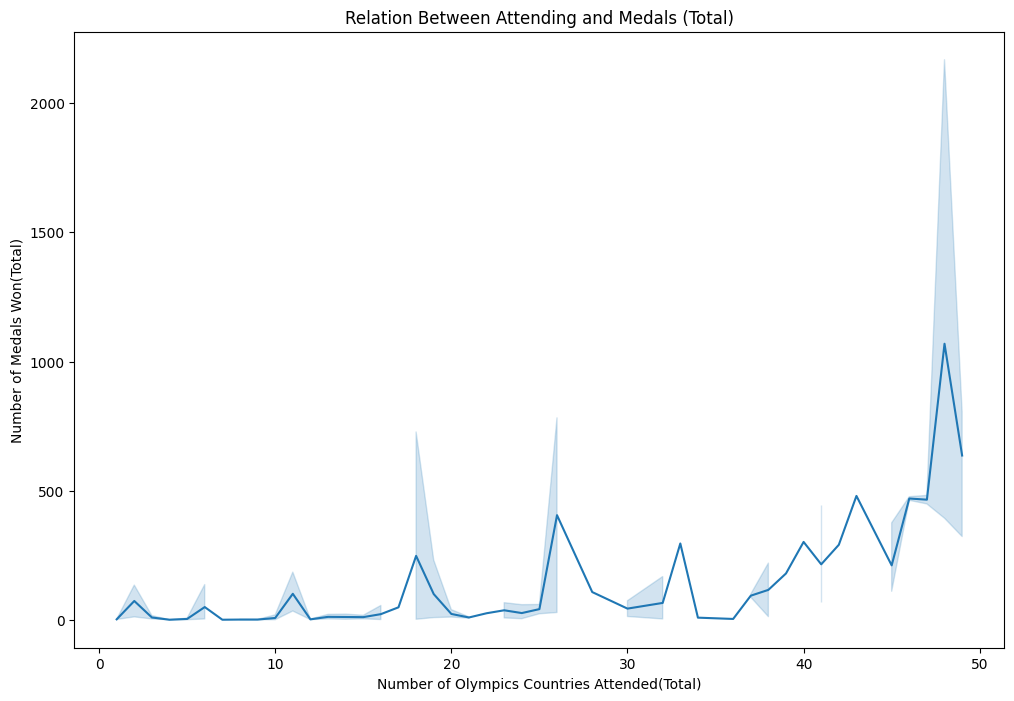

In [37]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize = (12,8))

sns.lineplot(x = '№ Games', y = 'Combined total', data = data)
plt.xlabel("Number of Olympics Countries Attended(Total)")
plt.title("Relation Between Attending and Medals (Total)")

plt.ylabel('Number of Medals Won(Total)')
plt.show()

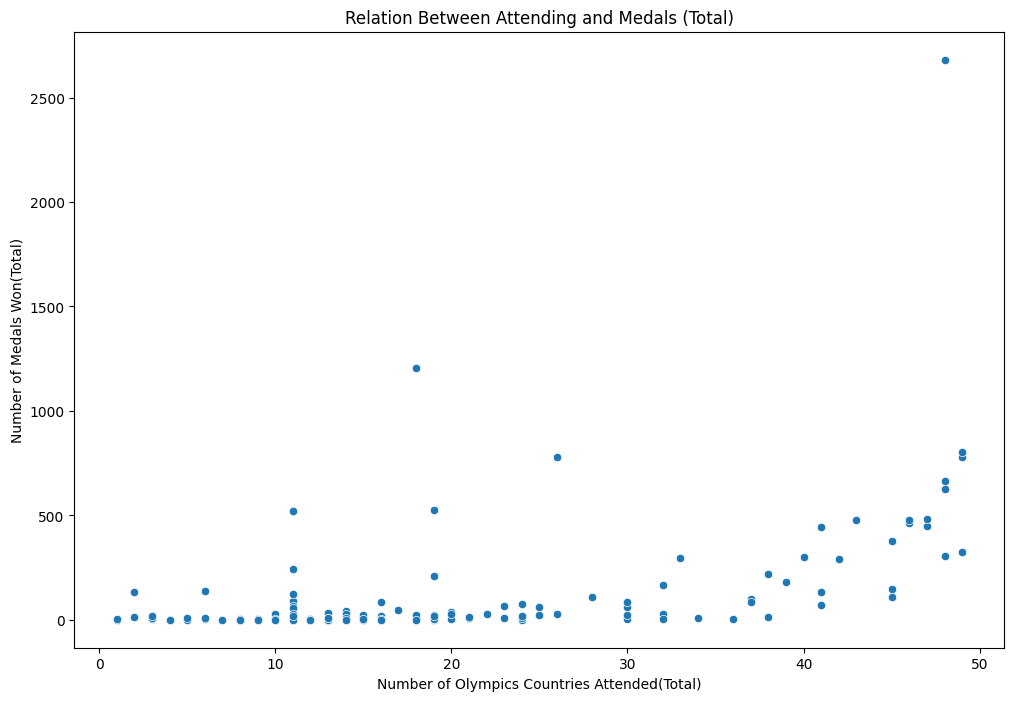

In [38]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize = (12,8))

sns.scatterplot(x = '№ Games', y = 'Combined total', data = data)
plt.xlabel("Number of Olympics Countries Attended(Total)")
plt.ylabel('Number of Medals Won(Total)')
plt.title("Relation Between Attending and Medals (Total)")
plt.show()

In [39]:
# NBVAL_IGNORE_OUTPUT
summer_data.head()

,Country,Attended,Gold,Silver,Bronze,Total,Tournament
1,Afghanistan,13,0,0,2,2,Summer
2,Algeria,12,5,2,8,15,Summer
3,Argentina,23,18,24,28,70,Summer
4,Armenia,5,1,2,9,12,Summer
5,Australasia,2,3,4,5,12,Summer


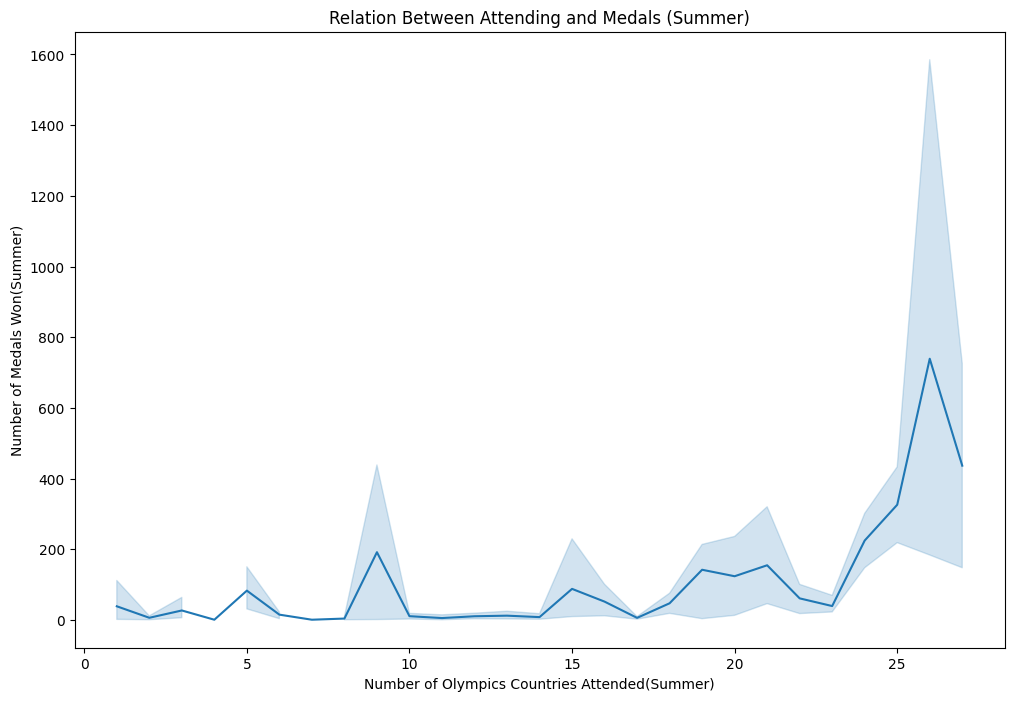

In [40]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize = (12,8))

sns.lineplot(x = 'Attended', y = 'Total', data = summer_data)
plt.xlabel("Number of Olympics Countries Attended(Summer)")
plt.title("Relation Between Attending and Medals (Summer)")

plt.ylabel('Number of Medals Won(Summer)')
plt.show()

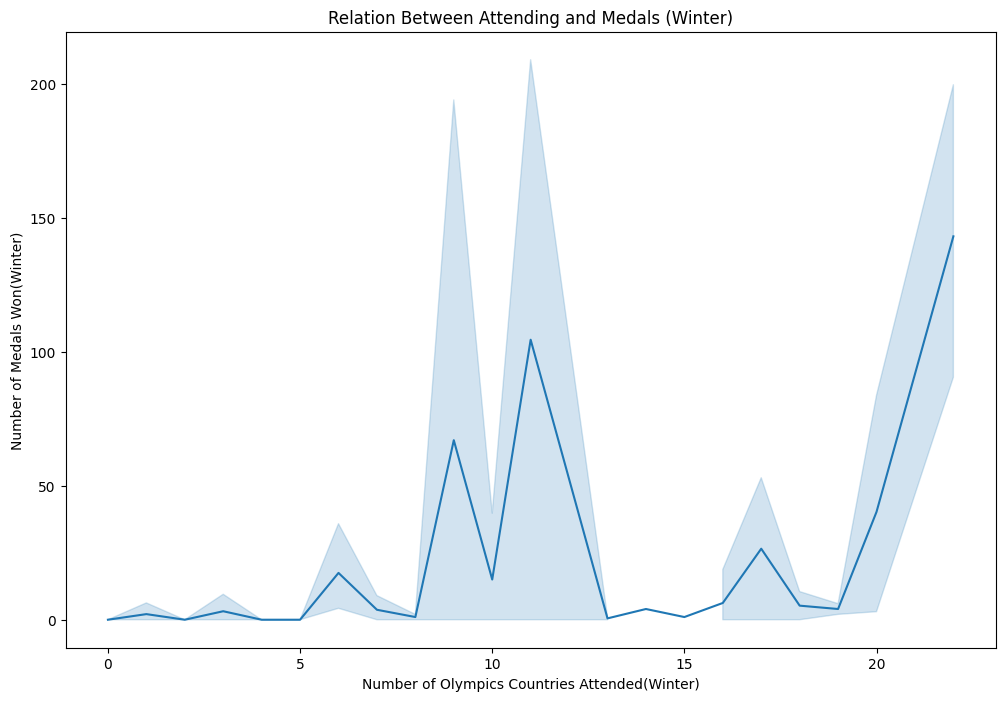

In [41]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize = (12,8))

sns.lineplot(x = 'Attended', y = 'Total', data = winter_data)
plt.xlabel("Number of Olympics Countries Attended(Winter)")
plt.title("Relation Between Attending and Medals (Winter)")

plt.ylabel('Number of Medals Won(Winter)')
plt.show()

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

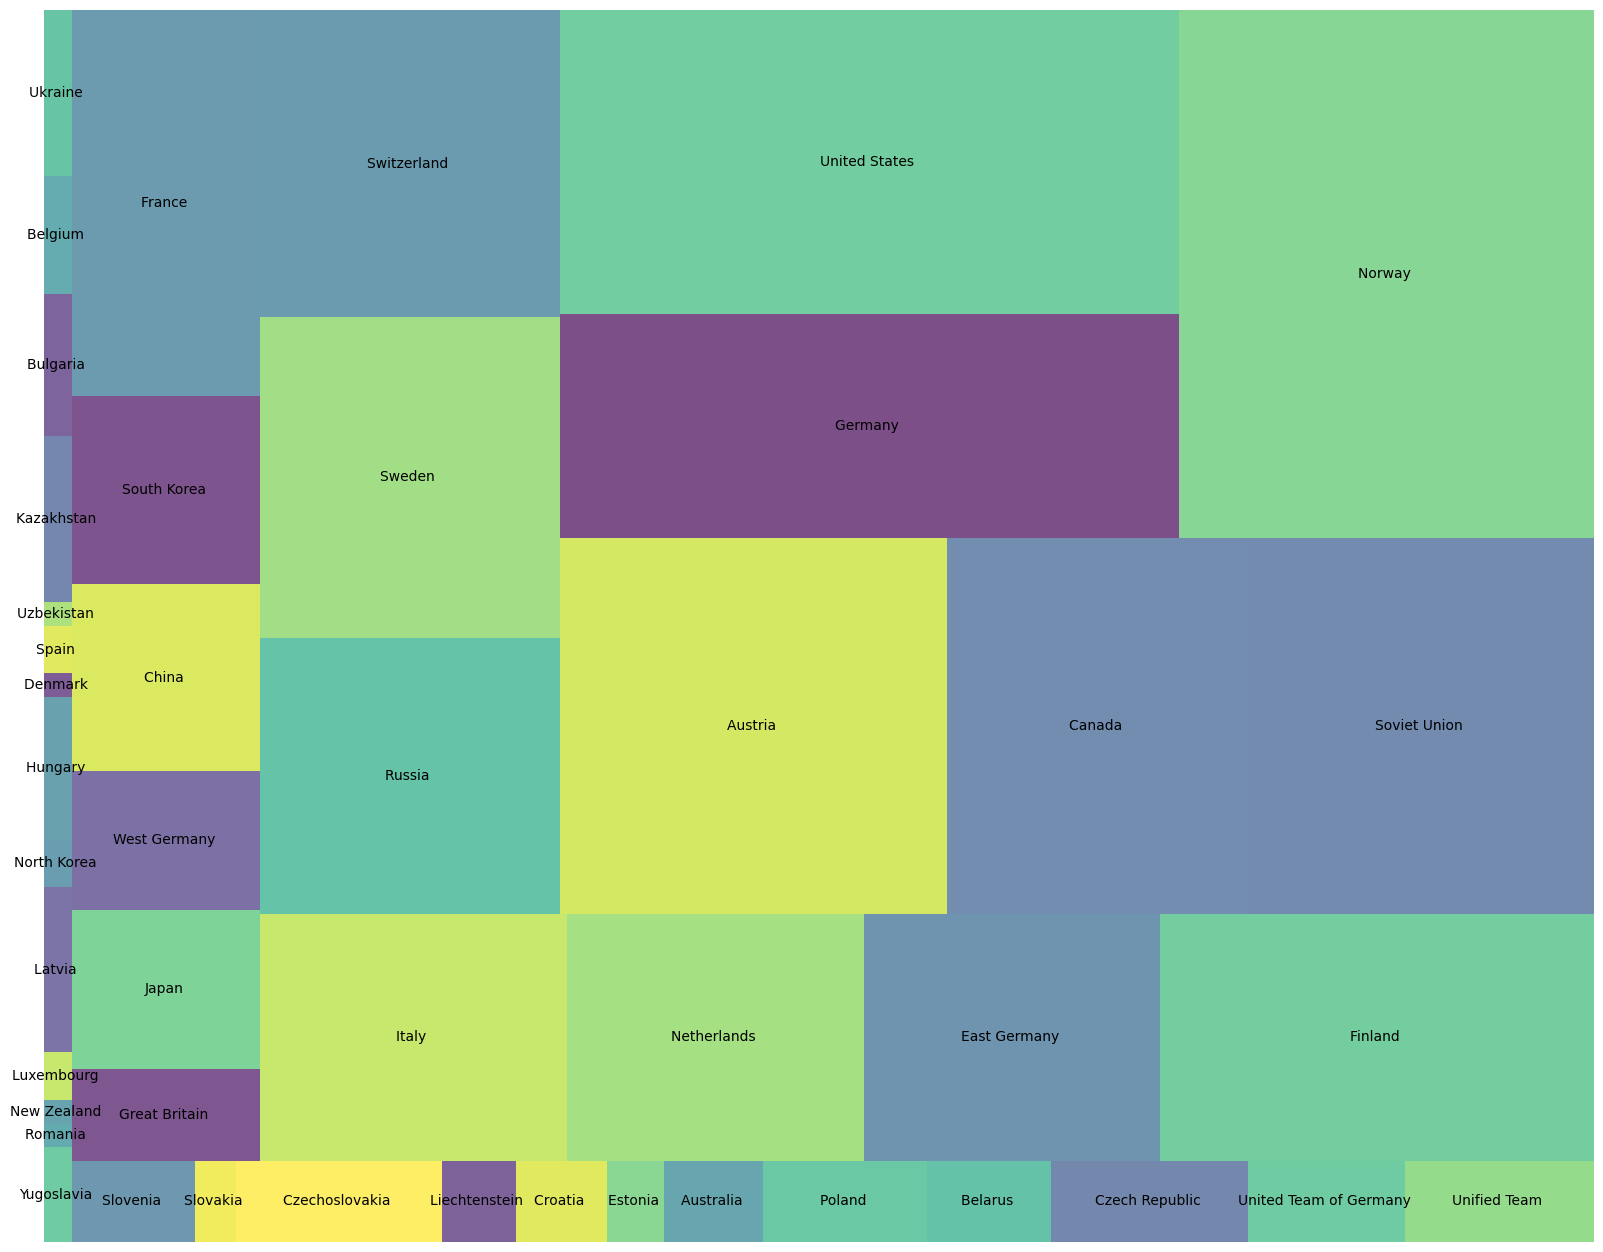

In [42]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize=(20, 16))

temp_winter = winter_data[winter_data['Total'] > 0].sort_values('Gold')
squarify.plot(sizes = temp_winter['Total'], label = temp_winter['Country'], alpha = 0.7)
plt.axis('off')


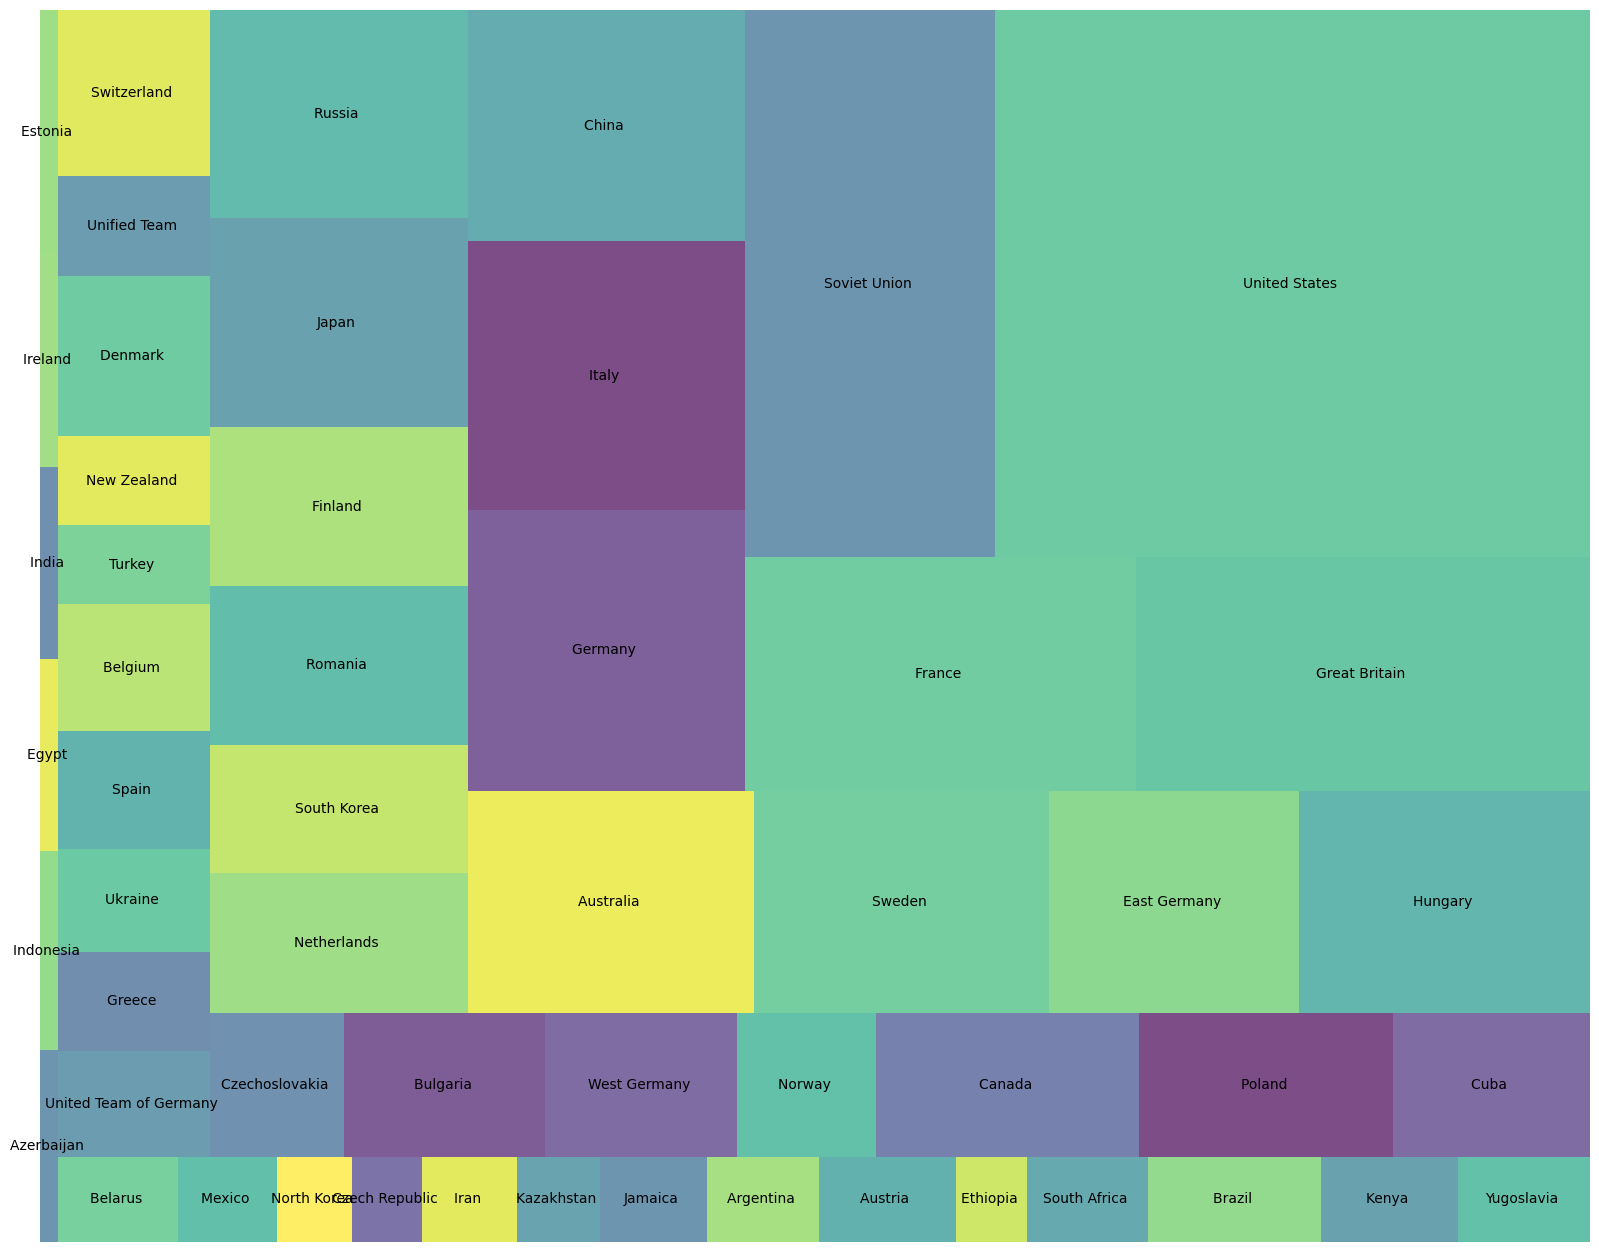

In [43]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize=(20, 16))

temp_summer = summer_data[summer_data['Total'] > 25].sort_values('Gold')
squarify.plot(sizes = temp_summer['Total'], label = temp_summer['Country'], alpha = 0.7)
plt.axis('off')
plt.show()


In [44]:
# NBVAL_IGNORE_OUTPUT
def plot_bar(df):
    fig, ax = plt.subplots(figsize=(16, 8))


    ax.bar(df['Tournament'], df['Gold'], label = 'Gold Medals')

    ax.bar(df['Tournament'], df['Silver'], bottom=df['Gold'], label = 'Silver Medals')
    ax.bar(df['Tournament'], df['Bronze'], bottom=df['Gold'] + df['Silver'], label = 'Bronze Medals')


    ax.set_ylabel("Number of medals")
    plt.title(f'Summer - Winter Medal Distribution ({df["Country"].unique()[0].strip()})')
    plt.legend()
    plt.show()


In [45]:
# NBVAL_IGNORE_OUTPUT
country_indexes = top_winners_totals.index

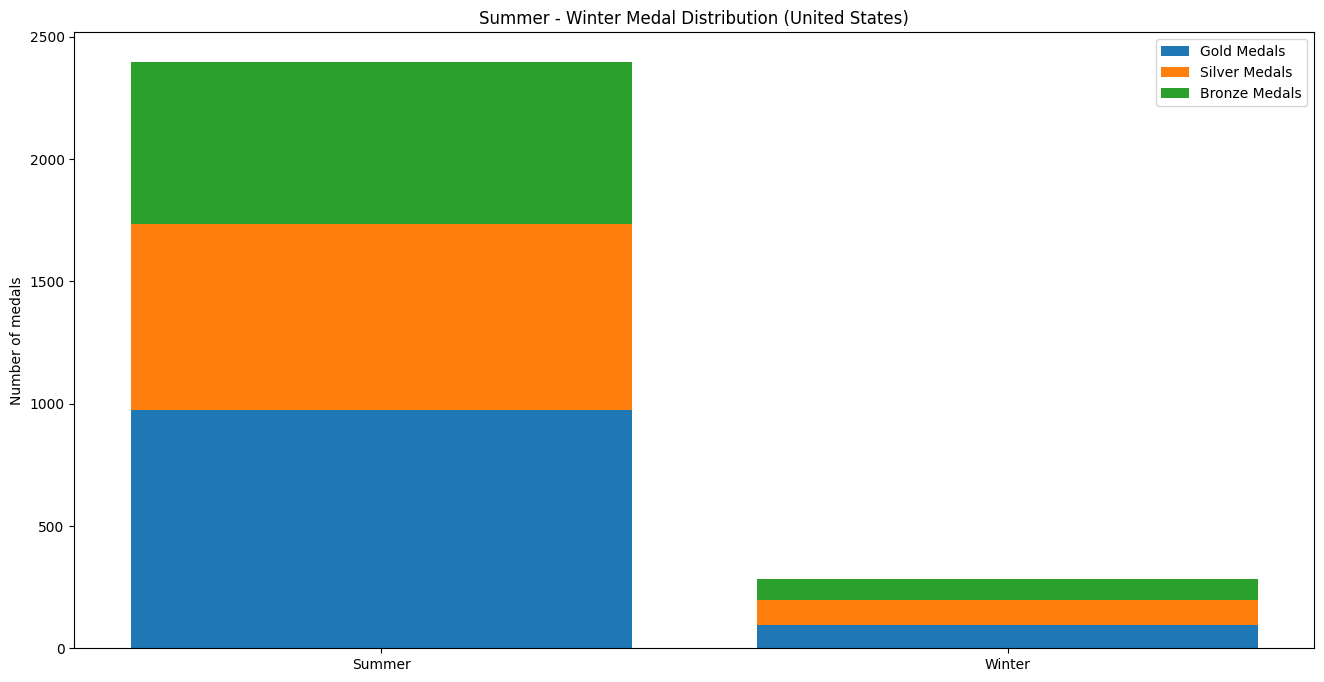

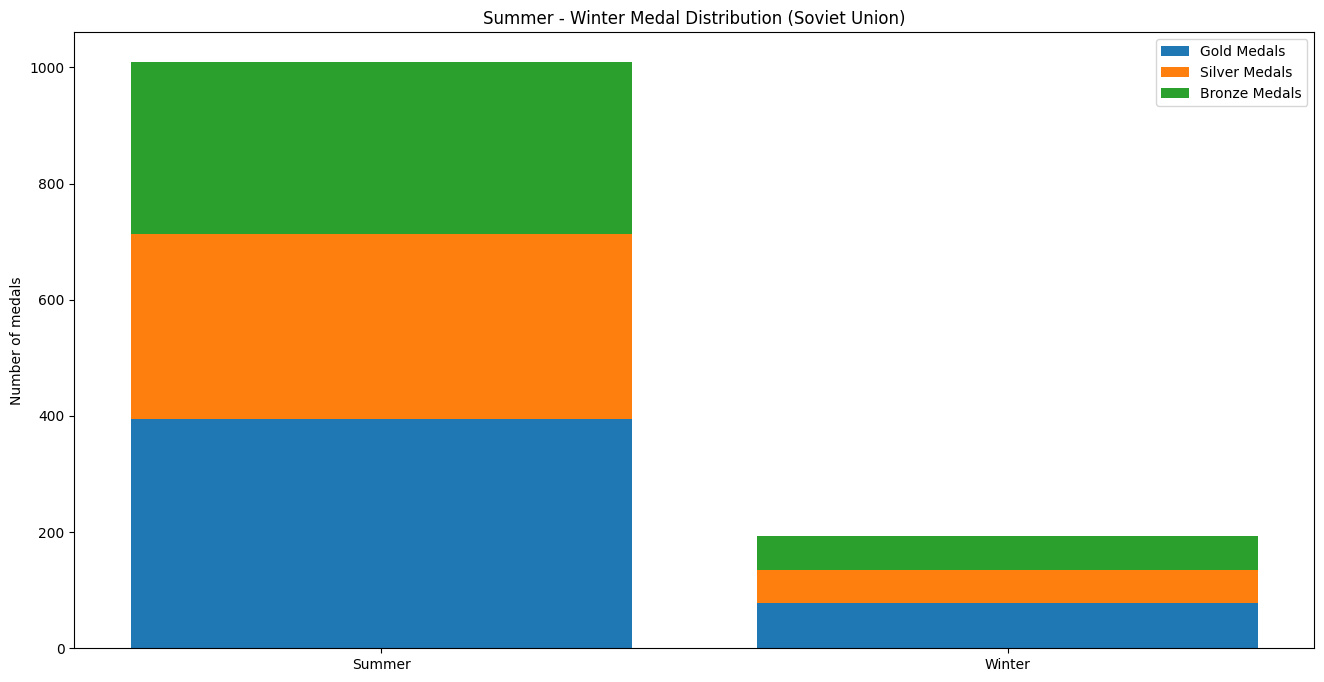

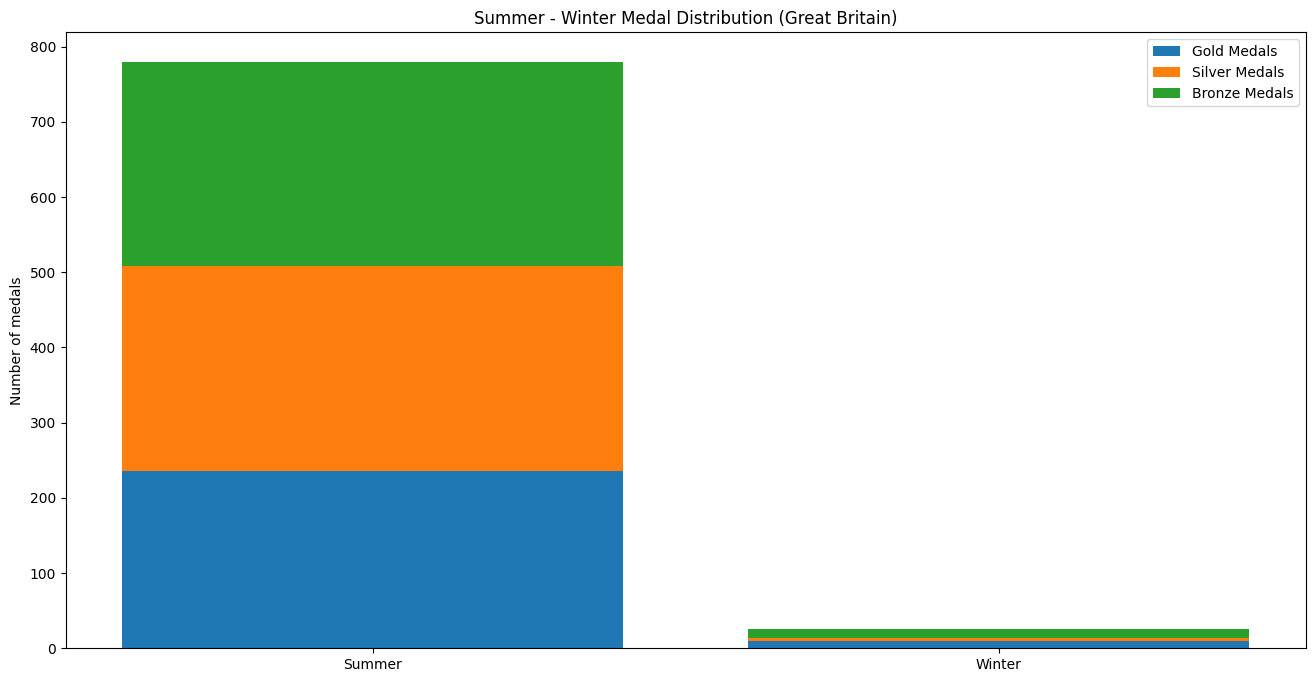

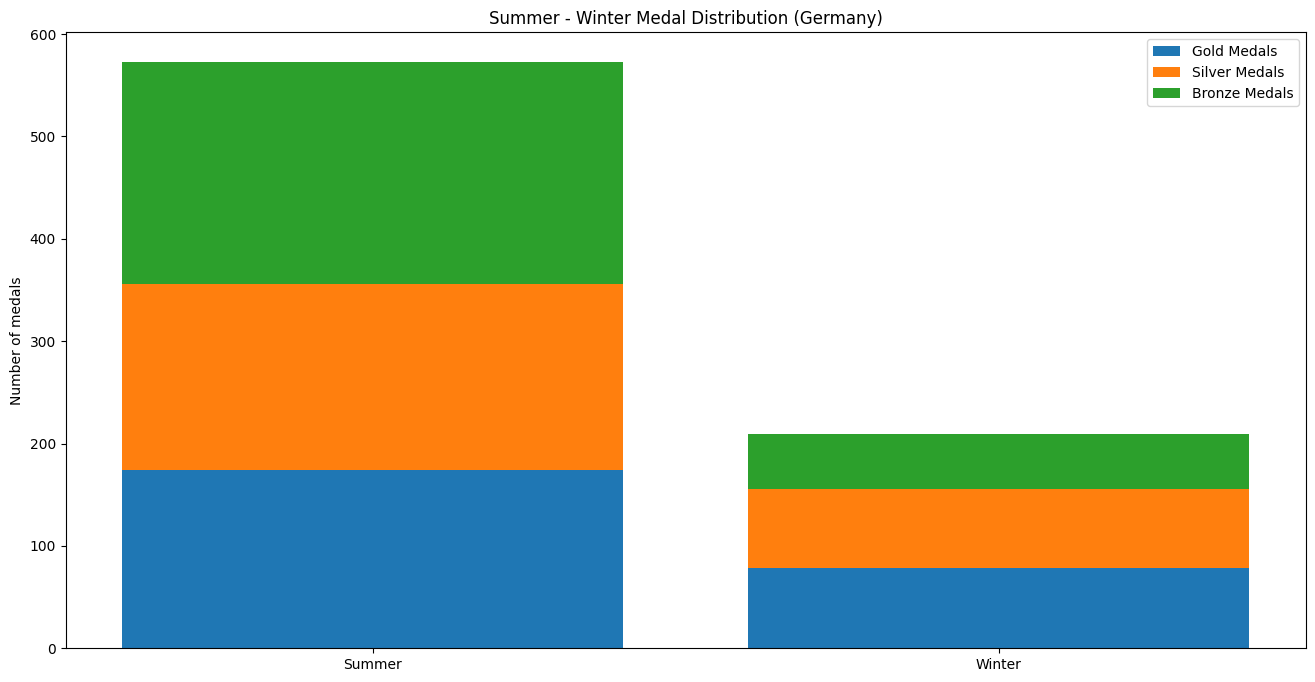

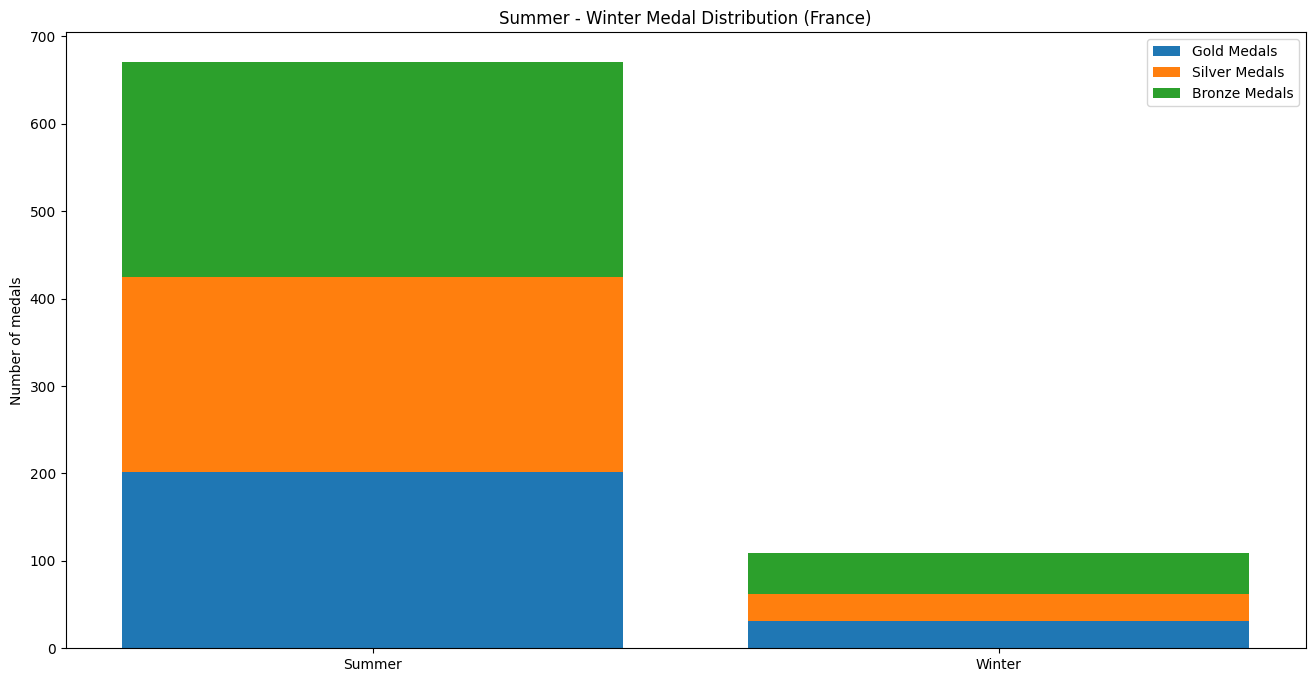

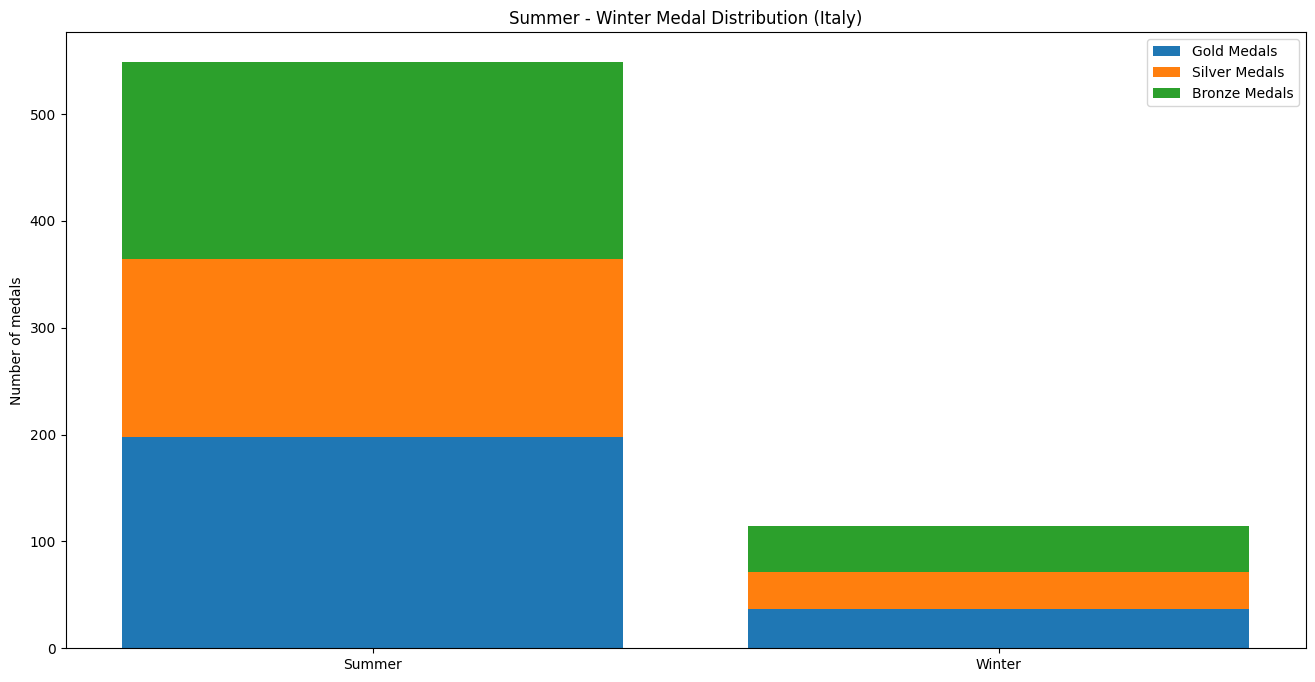

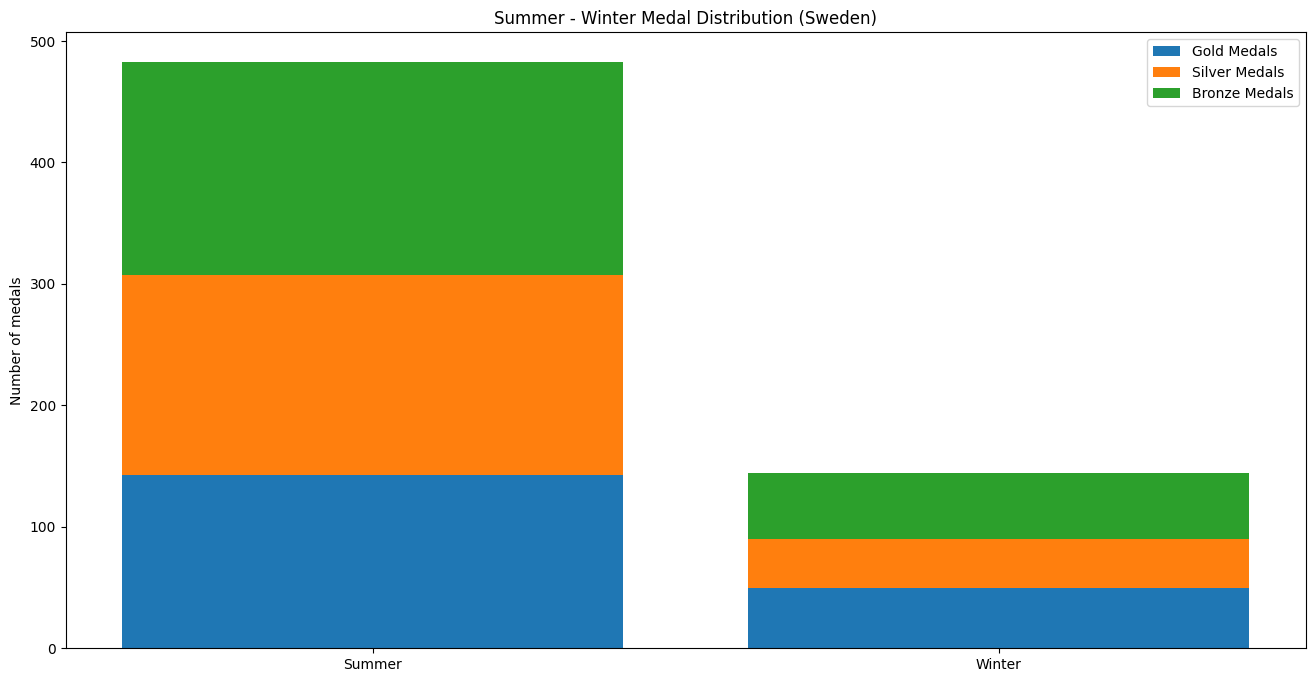

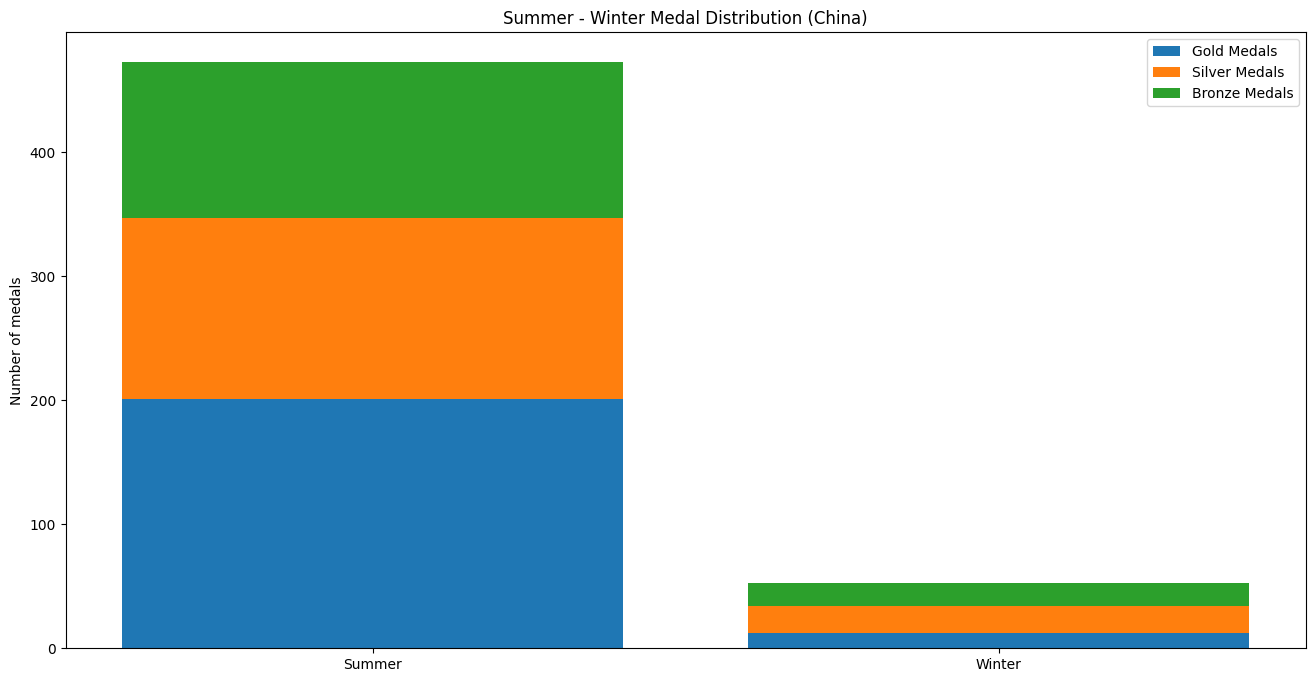

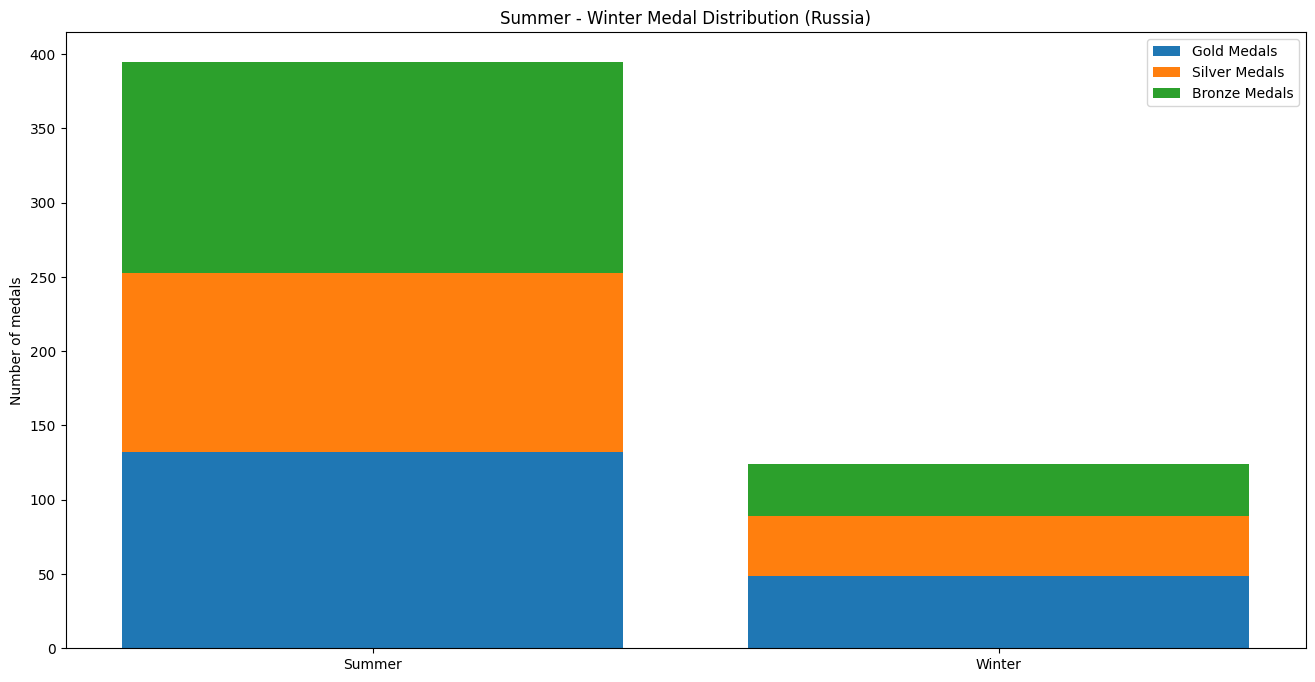

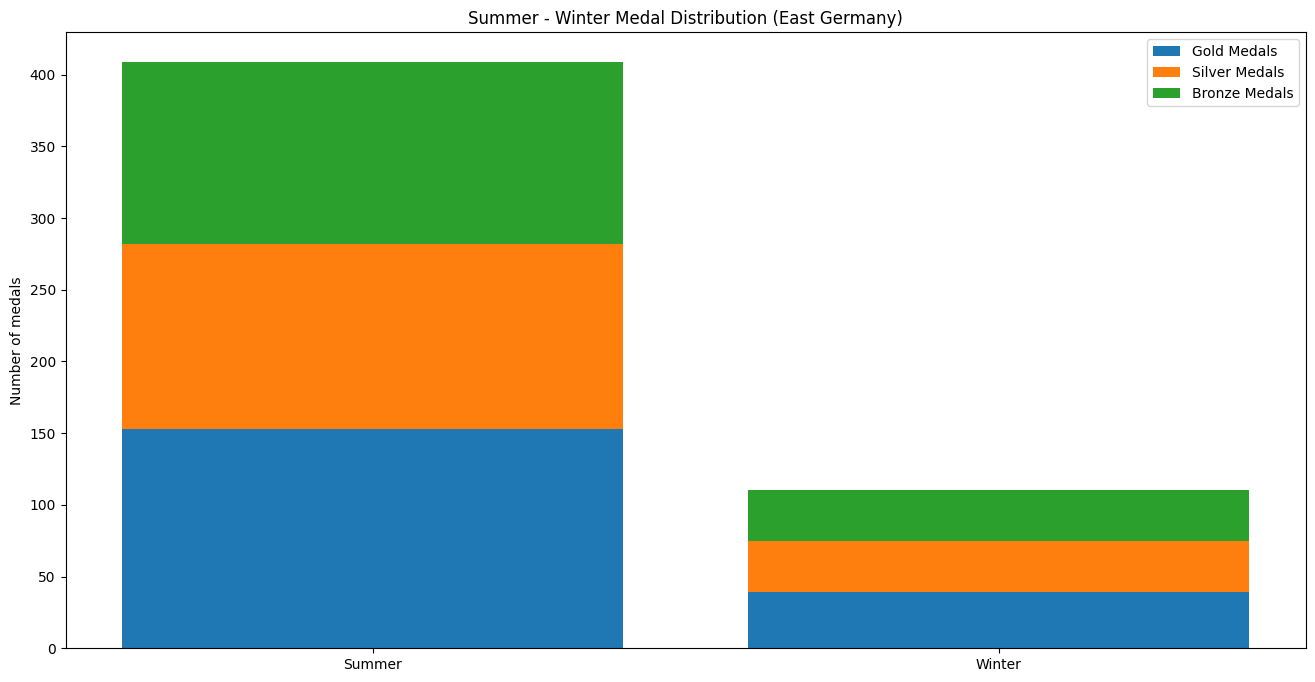

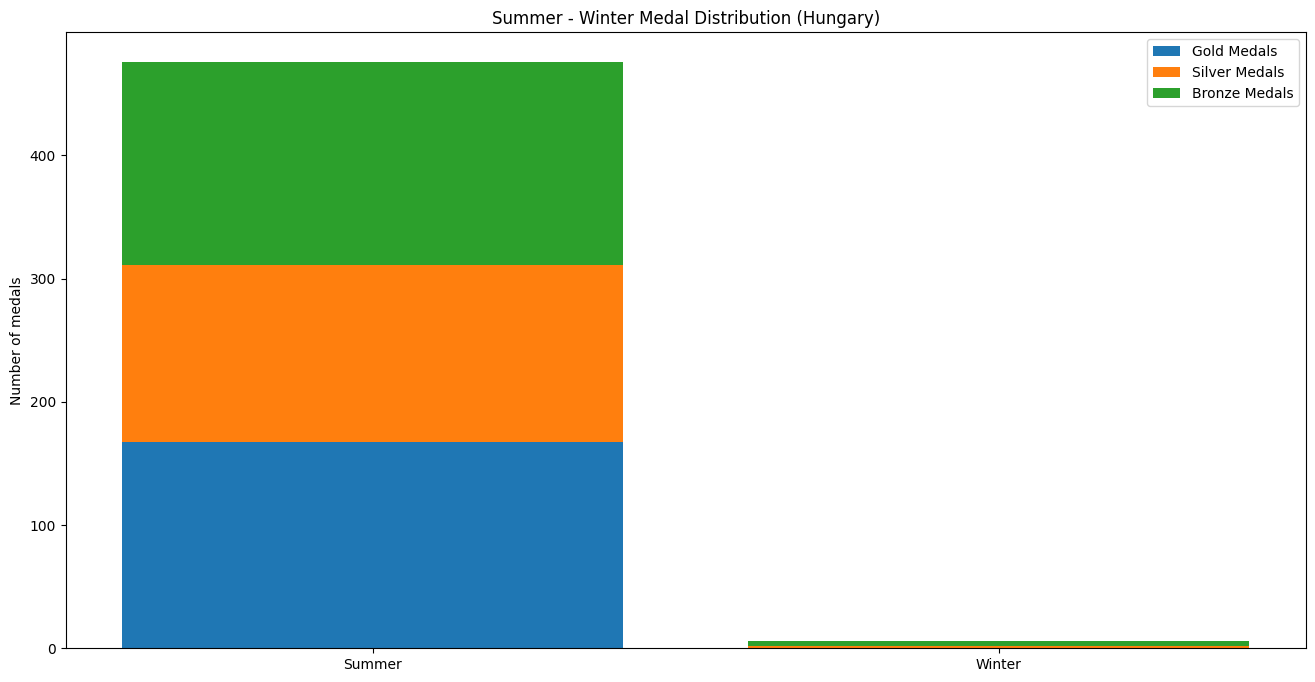

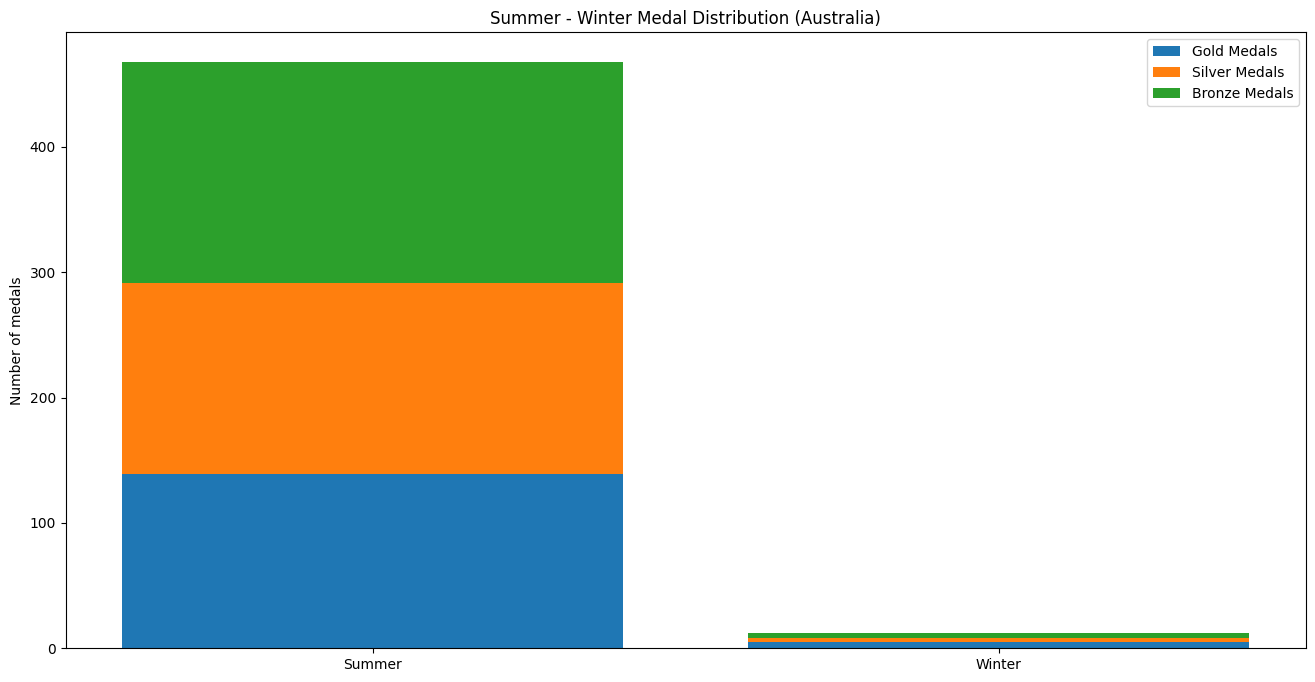

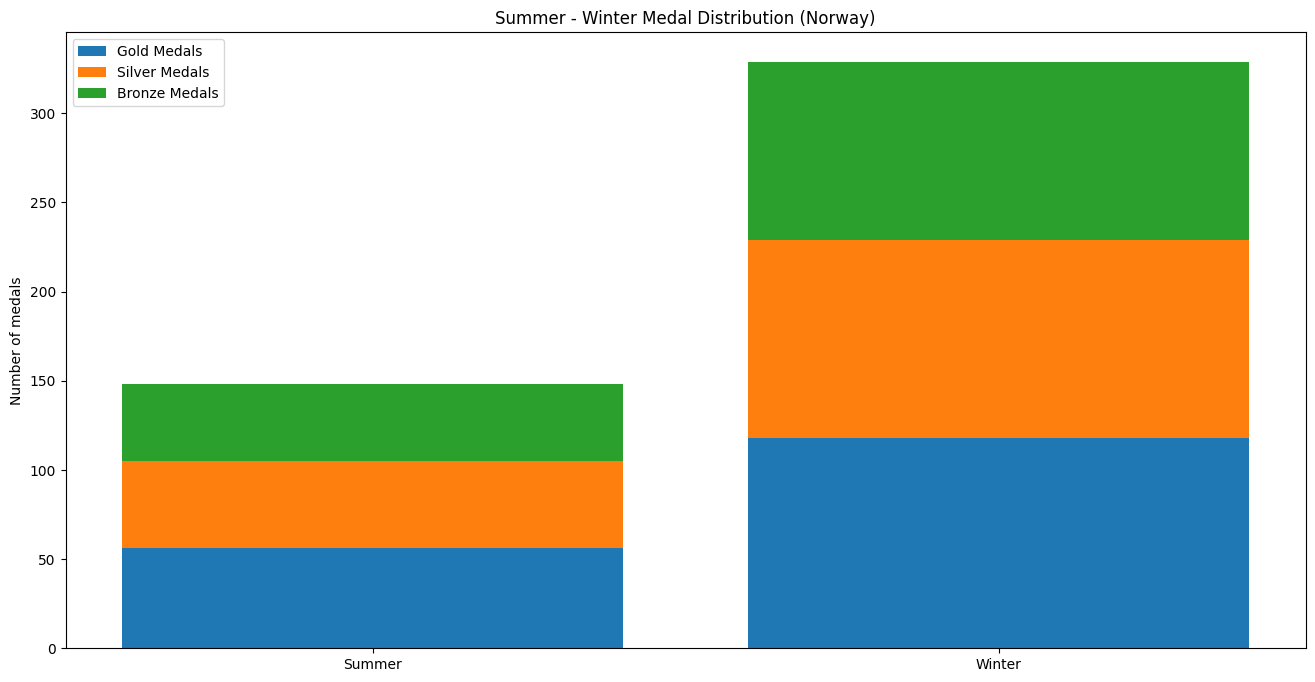

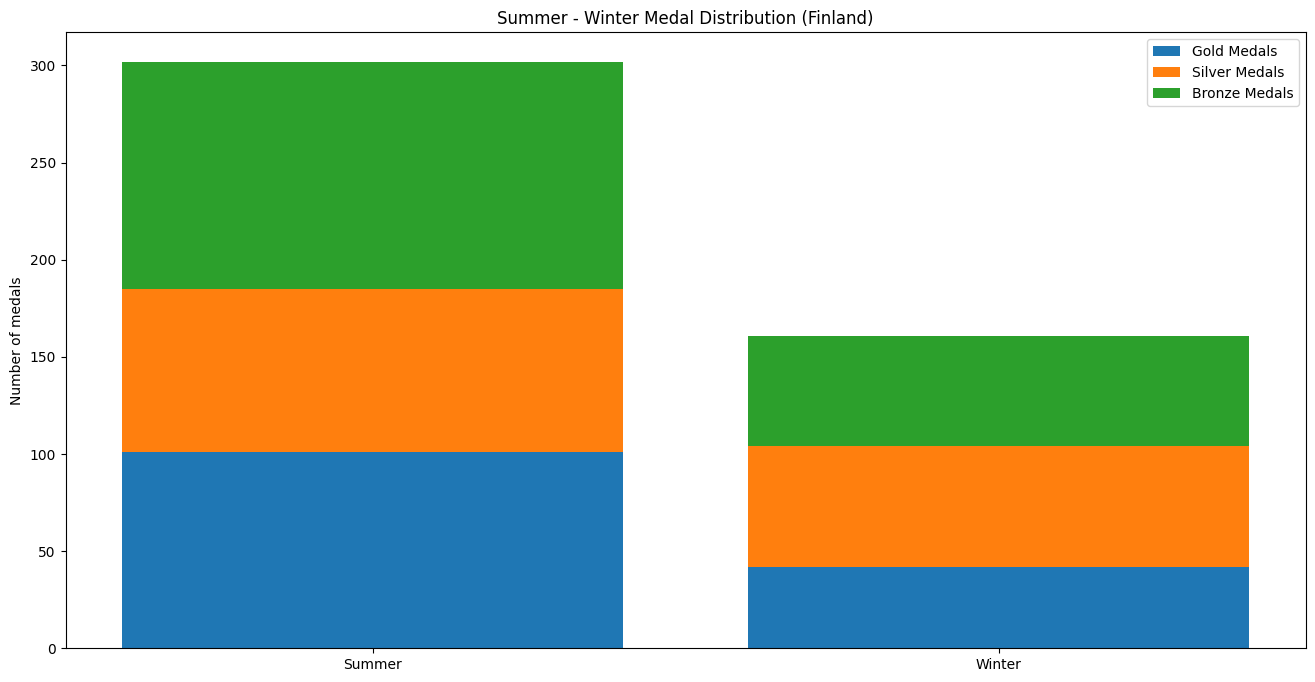

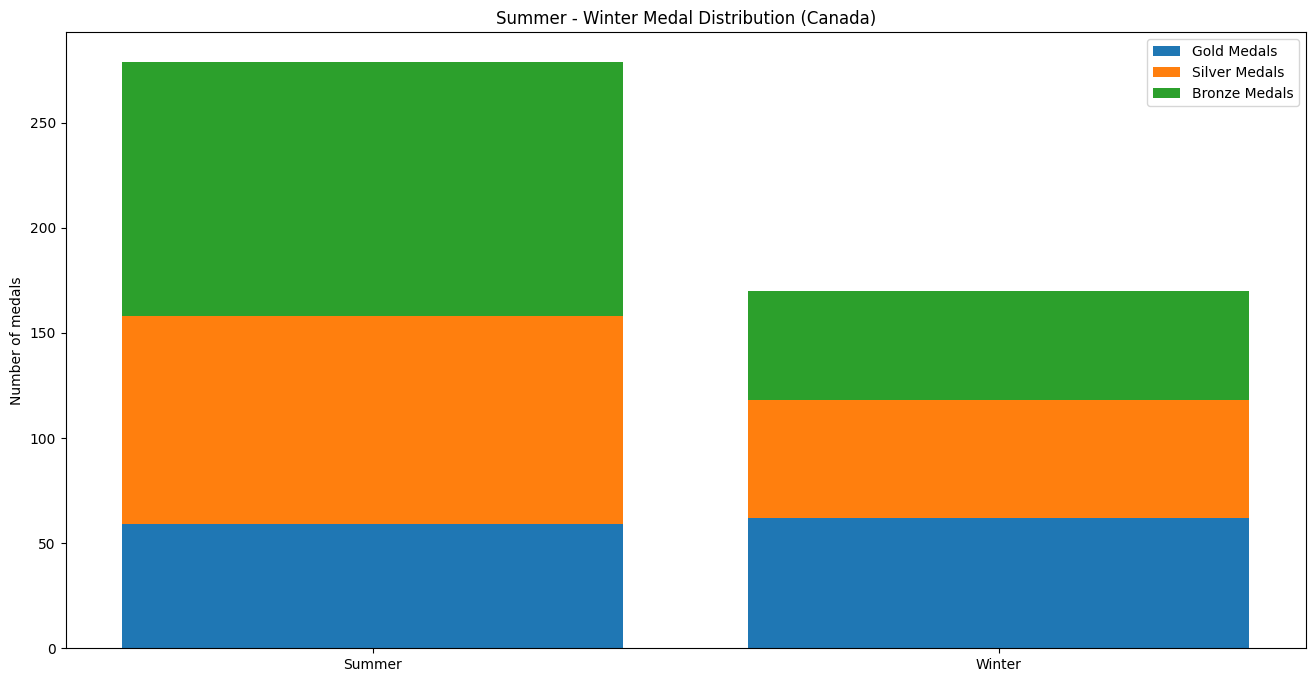

In [46]:
# NBVAL_IGNORE_OUTPUT
for country in country_indexes:
    temp_data_summer = summer_data.loc[country].reset_index().T.iloc[1:]
    temp_data_winter = winter_data.loc[country].reset_index().T.iloc[1:]

    temp_data_summer.columns = ['Country', 'Attended', 'Gold', 'Silver', 'Bronze', 'Total', 'Tournament']
    temp_data_winter.columns = ['Country', 'Attended', 'Gold', 'Silver', 'Bronze', 'Total', 'Tournament']

    full_temp_data = pd.concat((temp_data_summer, temp_data_winter))

    plot_bar(full_temp_data)